# In-Class Lab: Spearman’s Rank Correlation Test (Boston Housing Dataset")


## Assignment - Boston Housing Data
- College: Cornerstone International Community College of Canada - CICCC
- Student: Amir Lima Oliveira
- Due Date: May 26rd, 2025.

### Dataset Information

- **Dataset title**: Boston House Prices-Advanced Regression Techniques  
- **Source**: Kaggle  
- **Link**: https://www.kaggle.com/datasets/fedesoriano/the-boston-houseprice-data  
- **Description**: *The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.*

<details>
<summary> Objective</summary>

Analyze the relationship between socioeconomic factors and housing values using Spearman’s Rank Correlation Test.

</details>

---

#### Work project preparations

In [95]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns


<details>
<summary>1️⃣ Download and Load Dataset</summary>

- Download the dataset from Kaggle: Boston Housing Prices Dataset.
- Load the dataset into a Python environment using pandas.

</details>

---

In [96]:
import os
# This is needed to download the dataset from Kaggle
os.environ['KAGGLE_CONFIG_DIR'] = os.path.join(os.getcwd(), '.kaggle')
# Download the dataset from Kaggle
# Make sure to replace 'your-kaggle-username' and 'your-kaggle-key.json' with your actual username and key file
# You can find your Kaggle API token in your Kaggle account settings
# Make sure to have the Kaggle API installed
# !pip install kaggle
!kaggle datasets download -d fedesoriano/the-boston-houseprice-data --unzip


Dataset URL: https://www.kaggle.com/datasets/fedesoriano/the-boston-houseprice-data
License(s): copyright-authors




  0%|          | 0.00/12.3k [00:00<?, ?B/s]
100%|██████████| 12.3k/12.3k [00:00<00:00, 12.3MB/s]


<details>
<summary>2️⃣ Data Exploration and Cleaning</summary>

### Initial Inspection
- Understanding and Identify missing values on the dataset.

</details>

---

In [97]:
df = pd.read_csv('boston.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [99]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<details>
<summary>3️⃣ Feature Pairs Selection for Analysis</summary>

  - Variable Pairs to Analyze:
    1. **NOX & MEDV** – Does pollution relate to a decrease in housing value?
    2. **NOX & INDUS** – Is pollution associated with industrial land use?
    3. **NOX & LSTAT** – Is pollution more concentrated in lower-status populations?
    4. **NOX & CRIM** – Could pollution correlate with higher crime rates in degraded areas?

</details>

---

<details>
<summary>4️⃣ Spearman’s Rank Correlation and Specific visualization</summary>

- Use `scipy.stats.spearmanr()` to compute the correlation coefficient and p-value for each pair.
- Interpret the results:
  - Is the relationship significant?
  - Is it positive or negative?
  - How strong is the monotonic relationship?

</details>

---

In [100]:
from scipy.stats import spearmanr
# Calculate the Spearman correlation
def spearman_correlation(df, column1, column2):
    rho, p_value = spearmanr(df[column1], df[column2])
    if p_value < 0.05:
        print(f"The Spearman correlation between {column1} and {column2} is significant (p-value = {p_value:.4f})")
    else:
        print(f"The Spearman correlation between {column1} and {column2} is not significant (p-value = {p_value:.4f})")
    
    
    if rho == 1:
        print(f"There is a PERFECT POSITIVE correlation (rho = {rho:.4f})")
    elif rho == -1:
        print(f"There is a PERFECT NEGATIVE correlation (rho = {rho:.4f})")
    elif 0 < rho < 0.3:
        print(f"There is a WEAK POSITIVE correlation (rho = {rho:.4f})")
    elif -0.3 < rho < 0:
        print(f"There is a WEAK NEGATIVE correlation (rho = {rho:.4f})")
    elif 0.3 <= rho < 0.7:
        print(f"There is a MODERATE POSITIVE correlation (rho = {rho:.4f})")
    elif -0.7 <= rho < -0.3:
        print(f"There is a MODERATE NEGATIVE correlation (rho = {rho:.4f})")
    elif 0.7 <= rho < 1:
        print(f"There is a STRONG POSITIVE correlation (rho = {rho:.4f})")
    elif -1 < rho <= -0.7:
        print(f"There is a STRONG NEGATIVE correlation (rho = {rho:.4f})") 
    else:
        print(f"There is no correlation (rho = {rho:.4f})")
    return rho, p_value

- (NOX & MEDV)
* Pollution influence on Housing prices.

In [101]:
p1 = spearman_correlation(df, 'NOX', 'MEDV')

The Spearman correlation between NOX and MEDV is significant (p-value = 0.0000)
There is a MODERATE NEGATIVE correlation (rho = -0.5626)


<Axes: title={'center': 'Scatter Plot of NOX vs MEDV'}, xlabel='NOX', ylabel='MEDV'>

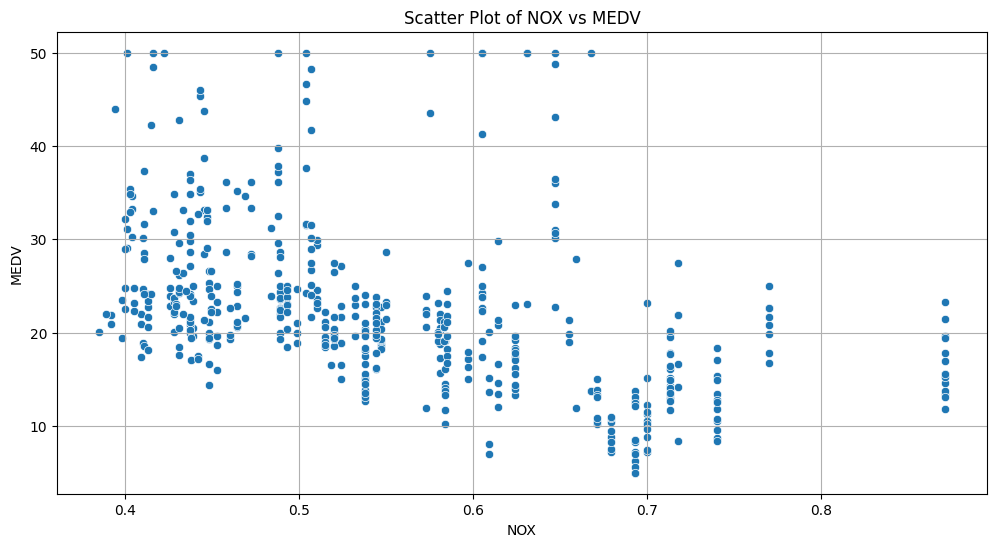

In [102]:
plt.figure(figsize=(12, 6))
plt.grid(True)
plt.title('Scatter Plot of NOX vs MEDV')
sns.scatterplot(x='NOX', y='MEDV', data=df)

- (NOX & INDUS)
* How pollution vary accordingly with the industrial land use.

In [103]:
p2 = spearman_correlation(df, 'NOX', 'INDUS')


The Spearman correlation between NOX and INDUS is significant (p-value = 0.0000)
There is a STRONG POSITIVE correlation (rho = 0.7912)


<Axes: title={'center': 'Scatter Plot of NOX vs INDUS'}, xlabel='NOX', ylabel='INDUS'>

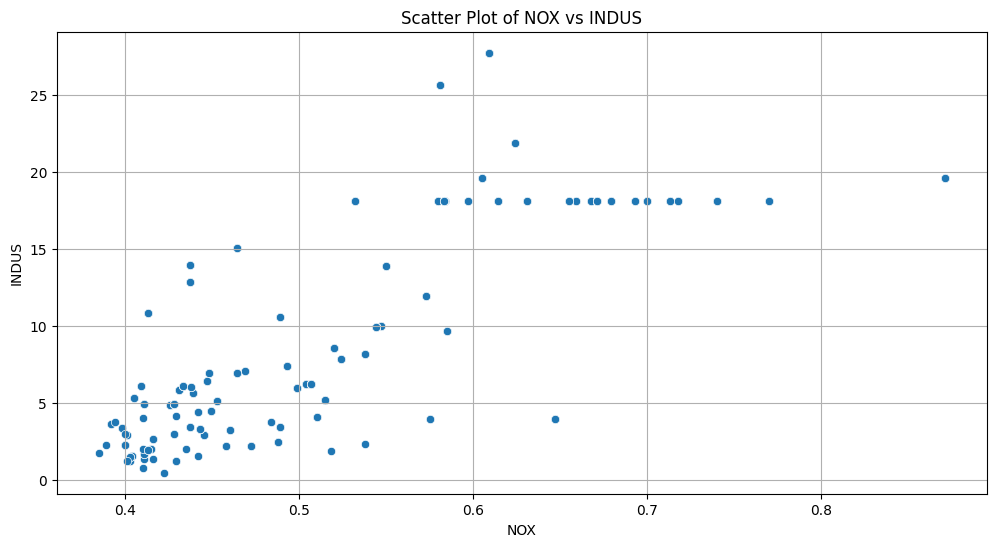

In [110]:
plt.figure(figsize=(12, 6))
plt.grid(True)
plt.title('Scatter Plot of NOX vs INDUS')
sns.scatterplot(x='NOX', y='INDUS', data=df)

- (NOX & LSTAT)
* Checking how impactfull pollution is with socioeconomic inequality.


In [105]:
p3 = spearman_correlation(df, 'NOX', 'LSTAT')

The Spearman correlation between NOX and LSTAT is significant (p-value = 0.0000)
There is a MODERATE POSITIVE correlation (rho = 0.6368)


<Axes: title={'center': 'Scatter Plot of NOX vs LSTAT'}, xlabel='NOX', ylabel='LSTAT'>

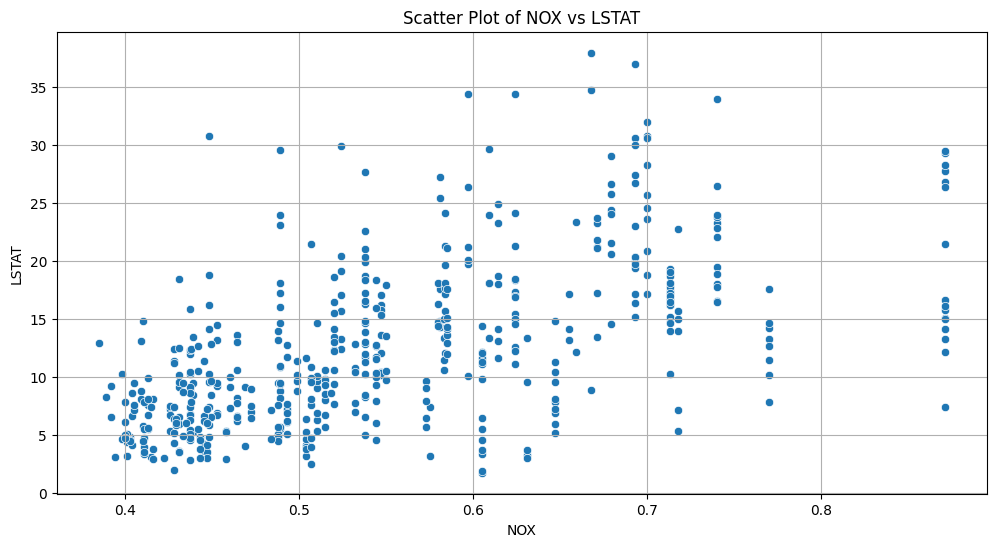

In [111]:
plt.figure(figsize=(12, 6))
plt.grid(True)
plt.title('Scatter Plot of NOX vs LSTAT')
sns.scatterplot(x='NOX', y='LSTAT', data=df)

- (NOX & CRIM)
* How pollution is related with criminality causing urban degradation/social stress.

In [107]:
p4 = spearman_correlation(df, 'NOX', 'CRIM')

The Spearman correlation between NOX and CRIM is significant (p-value = 0.0000)
There is a STRONG POSITIVE correlation (rho = 0.8215)


<Axes: title={'center': 'Scatter Plot of NOX vs CRIM'}, xlabel='NOX', ylabel='CRIM'>

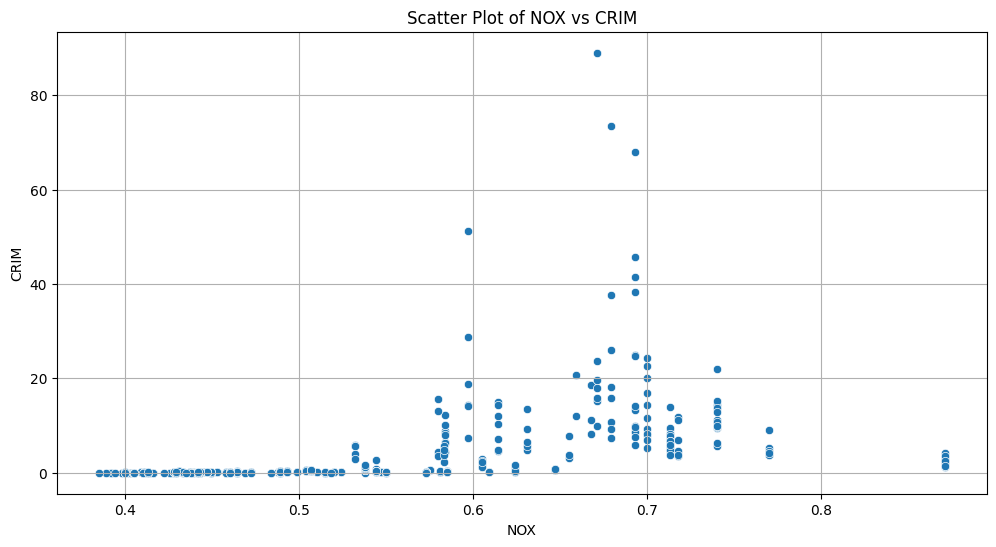

In [112]:
plt.figure(figsize=(12, 6))
plt.grid(True)
plt.title('Scatter Plot of NOX vs CRIM')
sns.scatterplot(x='NOX', y='CRIM', data=df)

<details>
<summary>5️⃣ General Visualization</summary>

### Correlation Heatmap

</details>

---

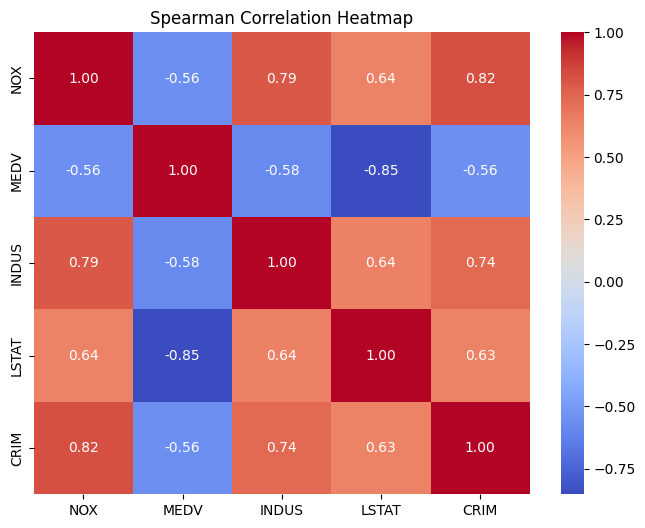

In [109]:
variables = ['NOX', 'MEDV', 'INDUS', 'LSTAT', 'CRIM']
spearman_corr = df[variables].corr(method='spearman')

plt.figure(figsize=(8, 6))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Spearman Correlation Heatmap")
plt.show()


<details>
<summary>6️⃣ Variable Correlation Findings</summary>

### Interpretation, Insights and Conclusions

</details>

---

In this analysis, I approached the Boston Housing dataset from an environmental impact perspective, using the NOX (nitric oxides concentration) variable as a proxy for pollution and degradation. By examining how NOX correlates with key socioeconomic and urban indicators, the goal was to explore how environmental quality intersects with housing dynamics in urban settings.

- Variable Findings:

    1. NOX & MEDV (Median Housing Value)
        ρ = -0.5626, p = 0.0000
        A moderate negative and statistically significant correlation suggests that higher pollution levels are associated with lower housing prices. This indicates that air quality may be a factor in real estate devaluation — possibly due to health risks or undesirable living conditions.

    2. NOX & INDUS (Industrial Land Proportion)
        ρ = 0.7912, p = 0.0000
        A strong positive correlation confirms a clear link between pollution and industrial land use. This matches the expectation that more industrialized areas tend to have higher NOX levels, reinforcing how zoning decisions and economic activity can directly affect environmental conditions.

    3. NOX & LSTAT (% Lower Status Population)
        ρ = 0.6368, p = 0.0000
        This moderate positive correlation implies that lower-income or marginalized populations may be more exposed to polluted environments. It supports the idea of environmental inequality, suggesting that social vulnerability often overlaps with environmental degradation — a major concern in urban planning and public health.

    4. NOX & CRIM (Crime Rate)
        ρ = 0.8215, p = 0.0000
        This was the strongest positive correlation in the analysis. While not initially expected, it helps reinforce the idea that areas with higher pollution levels also experience broader urban stressors, such as crime and reduced investment. Although we can’t assume causation with this dataset alone, this relationship suggests that environmental degradation may be part of a wider pattern of urban decline.

- Conclusion

    - This analysis reveals that pollution (NOX) is not just an environmental metric — it may also reflect socioeconomic disparities and signs of urban decay. The patterns show that areas with higher NOX levels tend to have lower housing values, higher industrial land use, more marginalized populations, and higher crime rates.

    - These findings highlight the importance of integrating environmental quality into housing policy, urban planning, and social equity initiatives.

    - By framing this project through the lens of environmental data science, I aimed to emphasize how environmental conditions can be quantitatively linked to urban well-being. 

### Looking Ahead: Expanding the Analysis

- If extended, this kind of study could benefit from additional variables such as:

    * Urban parks (count or total area in km²)

    * Green space coverage (km²)

    * Proximity to urban rivers (measured in km or meters from housing zones)

    * City industry density or proximity (km radius)

    * Cement or asphalt land cover rate (km²)

These factors could help compensate or contextualize NOX concentrations and provide a more holistic view of environmental stress and its impact on housing and communities.

### Dataset Credits

This project uses the **Boston House Prices – Advanced Regression Techniques** dataset, published on [Kaggle](https://www.kaggle.com/datasets/fedesoriano/the-boston-houseprice-data) by **Federico Soriano**.

- **Dataset Title**: Boston House Prices – Advanced Regression Techniques  
- **Source**: [Kaggle - fedesoriano](https://www.kaggle.com/datasets/fedesoriano/the-boston-houseprice-data)  
- **Original Research Citation**:  
  Harrison, D., & Rubinfeld, D.L. (1978). *Hedonic prices and the demand for clean air*.  
  *Journal of Environmental Economics and Management*, **5**(1), 81–102.  

> 📎 Note: This dataset is a modernized version of the original Boston Housing dataset and is widely used for regression modeling, educational purposes, and environmental economics research.

